## Heart Attack Analysis and Prediction

## What will we do in this project?
* Explarotary Data Analysis
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box, Swarm, Cat, Correlation Plot Analysis
* Outlier Detection
* Machine Learning Modelling and Tuning ML Model

## Introduction

* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.





## Analysis Content
1. [Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10. [Swarm Plot Analysis](#10)
11. [Cat Plot Analysis](#11)
12. [Correlation Analysis](#12)
13. [Outlier Detection](#13)
14. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Hyperparameter Tuning

<a id=1></a>
## Python Libraries
* In this section, we import used libraries during this notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id=2></a>
## Data Content


* **Age:**  Age of the patient

* **Sex:** Sex of the patient

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **ca:** number of major vessels (0-3)

* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* **trtbps:** resting blood pressure (in mm Hg)

* **chol:** cholestoral in mg/dl fetched via BMI sensor

* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* **thalach:** maximum heart rate achieved

* **target:** 0= less chance of heart attack 1= more chance of heart attack 

* **oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* **slp:** the slope of the peak exercise ST segment 0: downsloping; 1: flat; 2: upsloping
* **caa:** The number of major vessels (0–3)
* **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect

<a id=3></a>
## Read and Analyse Data
* In this section, we will read heart.csv

In [2]:
#read data
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
##basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
#information about dataframe
df.info()
#There is no missing value in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id=4></a>
## Missing Value Analysis

In [6]:
#we cannot train our model with missing values
#so we check whether there is missing value or not
#we will use logistic regression and we will assing weight to each feature
df.isnull()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id=5></a>
## Unique Value Analysis

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#how many unique value in 'sex'
df['sex'].value_counts().shape[0]

2

In [11]:
#we will print counts of unique values of each feature
for i in list(df.columns):
    print("{}--{}".format(i, df[i].value_counts().shape[0]))

age--41
sex--2
cp--4
trtbps--49
chol--152
fbs--2
restecg--3
thalachh--91
exng--2
oldpeak--40
slp--3
caa--5
thall--4
output--2


* sex, cp, fbs, restecg, exng, slp, caa, thall and output are categoric variables
* We analyzed numeric and categoric variables because:
    * Numeric and categoric variables are visualized by different methods
    * when we train our ml model, we will change format our categoric variables by encoding methods

<a id=6></a>
## Categorical Feature Analysis

In [12]:
categorical_list=["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall","output"]

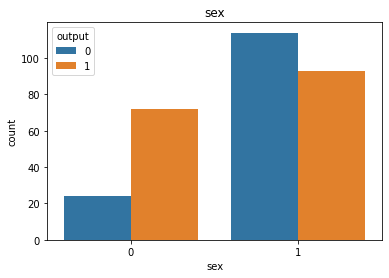

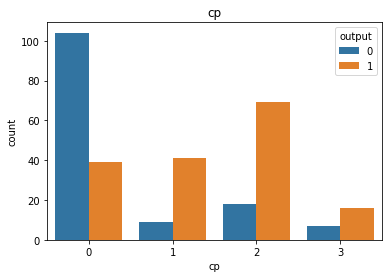

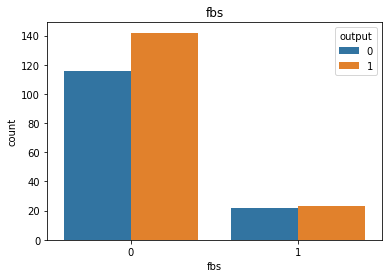

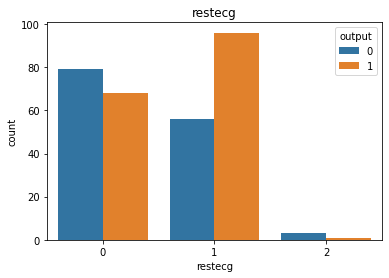

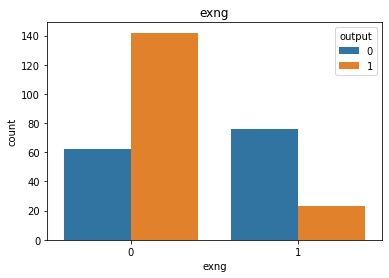

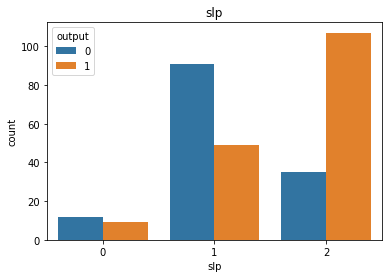

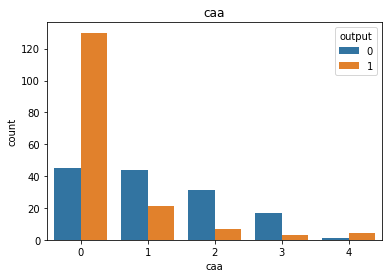

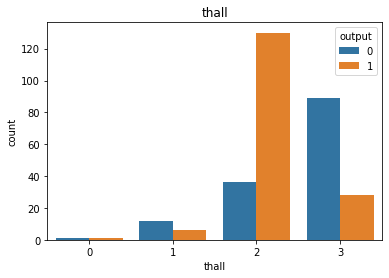

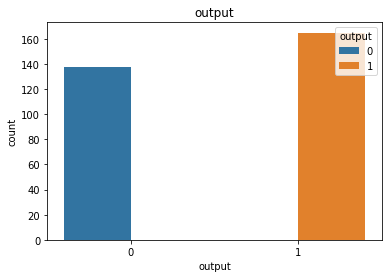

In [13]:
#hue is our class. That is we will visualize according to output
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data=df_categoric, hue="output")
    plt.title(i)

<a id=6></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [14]:
numeric_list=["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]

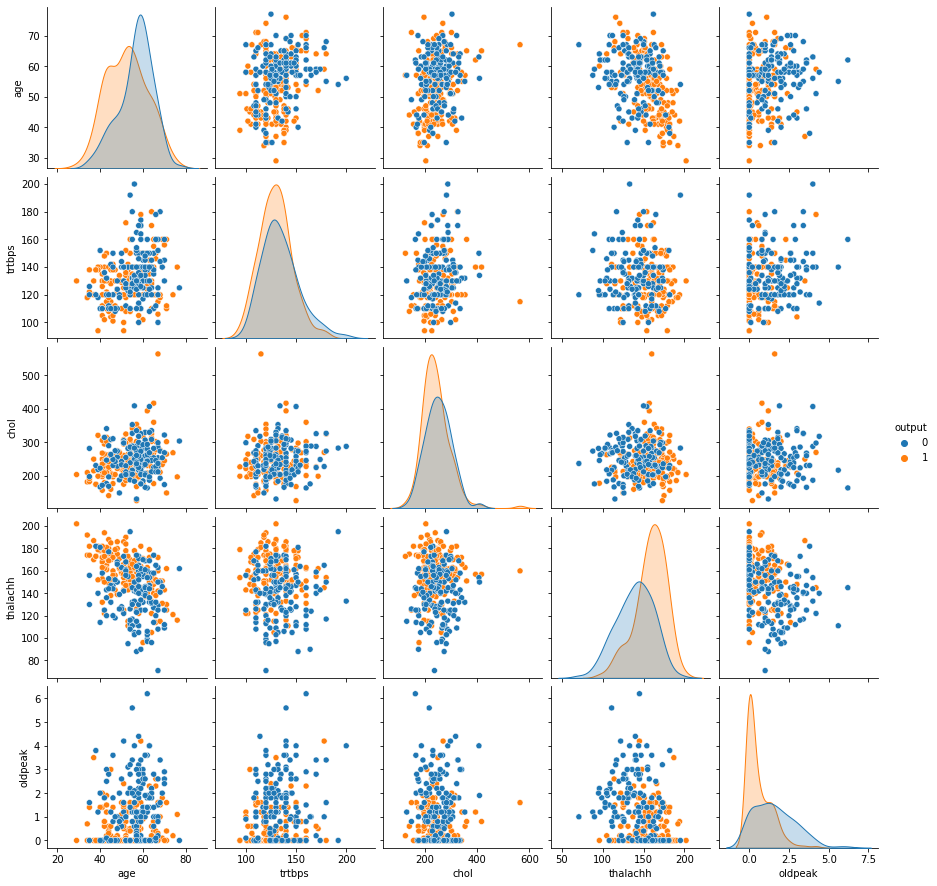

In [15]:
#in graph diagonal we used kernel density estimation that is kde
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output", diag_kind="kde")
plt.show()

* each row and column has numeric features and the diagonal has a distribution of these features.
* The relationship of each numerical feature to each other is shown with a scatter plot. 
* oldpeak has positive skewness 
* thalachh has negative skewness 
* the important thing is correlations of features. We want them not to be correlated with each other. Because if two features are very related to each other, one of these features is sufficient for us. 
* if there is no correlation, each is a different source of information for us. 

<a id=8></a>
## Standardization
* standardization makes data visualization easier
* It allows the ml algorithm to train better.

In [16]:
#first we initialize a scaler
scaler=StandardScaler()
scaler

StandardScaler()

In [17]:
#we will standard numerical features except output
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])

In [18]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [19]:
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
1,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
2,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
3,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
4,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


* As shown in above table, std is 1 for each features. So we were able to standardize our numerical feautures

<a id=9></a>
## Box Plot Analysis

In [20]:
# we will use seaborn library
# We want to show the distribution of each feature according to output with boxplot. 
# so we need to melted data
# we will create dummy data
df_dummy=pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [21]:
# we will concatenation dummy dataframe with output
df_dummy=pd.concat([df_dummy, df.loc[:,"output"]], axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [22]:
#Pandas melt() function is used to change the DataFrame format from wide to long. 
#It’s used to create a specific format of the DataFrame object where one or more columns work as identifiers. 
#All the remaining columns are treated as values and unpivoted to the row axis and only two columns – variable and value.
data_melted=pd.melt(df_dummy, id_vars="output", var_name="features", value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


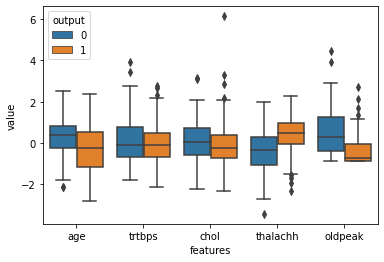

In [23]:
#box plot
plt.figure()
sns.boxplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

* median values of oldpeak feature are different according to the output. 
* median values of thalachh feature are different according to the output. 
* these features seem to be one of the important features when we train the logistic regression model. 
* chol feature has outlier.


<a id=10></a>
## Swarm Plot Analysis

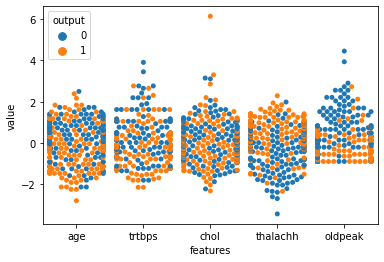

In [24]:
#swarm plot
# this plot is on the basis of individuals
plt.figure()
sns.swarmplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

<a id=11></a>
## Cat Plot Analysis

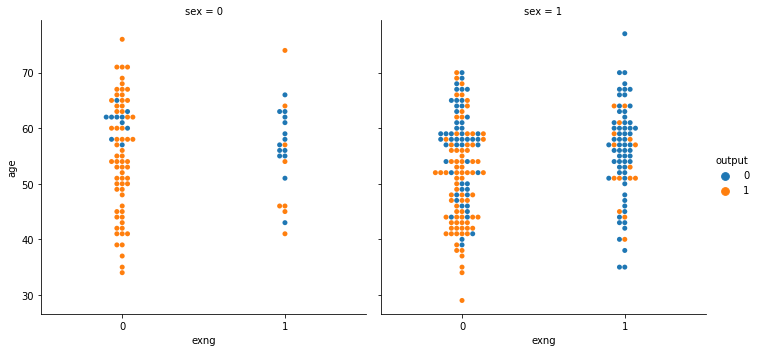

In [25]:
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)
plt.show()

<a id=12></a>
## Correlation Analysis

In [26]:
#if the correlation between features is 1, 
#these features are directly proportional to each other 
# if it is -1, then these features are inversely proportional to each other 
# if it is 0, there is no correlation between them
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


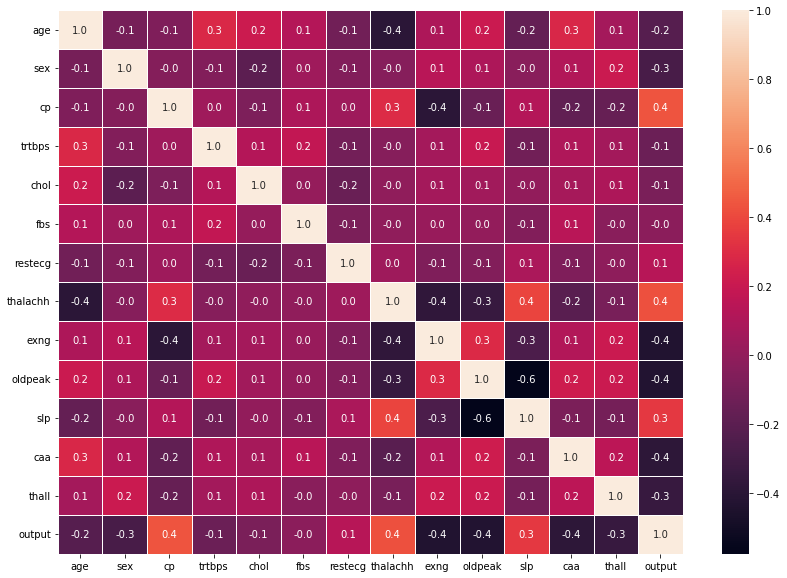

In [27]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()

* exng,oldpeak,ca and thall are inversely proportional to output
* thalachh,cp are directly proportional to output
* There is no correlation between trtbps,chol,fbs,nestecg and output

<a id=13></a>
## Outlier Detection
* outliers can disrupt ML process


In [28]:
numeric_list=["age", "trtbps", "chol", "thalachh", "oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [29]:
df_numeric.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [30]:
#outlier detection
#we will iterate each feature by loop
for i in numeric_list:
    
    #IQR
    #numpy.percentile()function used to compute the nth percentile of the given data (array elements) along the specified axis. 
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)
    
    IQR=Q3-Q1
    print("Old Shape:",df.loc[:,i].shape)
    
    #upper bound
    #we can also use 1.5*IQR but we dont want drop many items
    #so we used 2.5*IQR
    upper=np.where(df.loc[:,i]>= (Q3+2.5*IQR))
    # The numpy.where() function returns the indices of elements in an input array where the given condition is satisfied.
    
    
    #lower bound
    lower=np.where(df.loc[:,i]<= (Q1-2.5*IQR))
    
    print("{}--{}".format(upper,lower))
    
    
    try:
    #upper returns array and datatype of array
    #so we dropped array[0] that is we dropped our outliers
        df.drop(upper[0], inplace=True)
    except: print("KeyError:{} not found in axis". format(upper[0]))
    
    try:
    #lower returns array and datatype of array
    #so we dropped array[0] that is we dropped our outliers
        df.drop(lower[0], inplace=True)
    except: print("KeyError:{} not found in axis". format(lower[0]))
        
    print("New shape: ", df.shape)

Old Shape: (303,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New shape:  (303, 14)
Old Shape: (303,)
(array([223, 248]),)--(array([], dtype=int64),)
New shape:  (301, 14)
Old Shape: (301,)
(array([85]),)--(array([], dtype=int64),)
New shape:  (300, 14)
Old Shape: (300,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New shape:  (300, 14)
Old Shape: (300,)
(array([203, 220]),)--(array([], dtype=int64),)
New shape:  (298, 14)


<a id=14></a>
## Modelling

In [31]:
df1=df.copy()

## Encoding Categorical columns
* Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models. In the field of data science, before going for the modelling, data preparation is a mandatory task


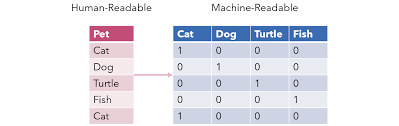

In [32]:
df1=pd.get_dummies(df1,columns=categorical_list[:-1],drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [33]:
X=df1.drop(["output"],axis=1)
y=df1[["output"]]

In [34]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [35]:
y.head()

,output
0,1
1,1
2,1
3,1
4,1


## Scaling

In [36]:
scaler=StandardScaler()
scaler

StandardScaler()

In [37]:
#The last feature of numeric_list is output
#So we didnt use output to scaler
#We standardized numerical features
X[numeric_list[:-1]]=scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.303950,-0.666538,2.297269,0.590082,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Train/Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


## Logistic Regression

* Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [39]:
logreg=LogisticRegression()
logreg

LogisticRegression()

In [40]:
#fitting=training
logreg.fit(X_train,y_train)

LogisticRegression()

In [41]:
#calculate probabilisties
y_pred_prob=logreg.predict_proba(X_test)
y_pred_prob

#first value refers to 0 (probability of not having a heart attack)
#second value refers to 1 (probability of having a heart attack)

array([[0.94252608, 0.05747392],
       [0.06987766, 0.93012234],
       [0.11254982, 0.88745018],
       [0.47977949, 0.52022051],
       [0.08754891, 0.91245109],
       [0.01966602, 0.98033398],
       [0.01313076, 0.98686924],
       [0.25608762, 0.74391238],
       [0.93025651, 0.06974349],
       [0.04680322, 0.95319678],
       [0.95711862, 0.04288138],
       [0.01124265, 0.98875735],
       [0.41858447, 0.58141553],
       [0.6057325 , 0.3942675 ],
       [0.02733085, 0.97266915],
       [0.0261538 , 0.9738462 ],
       [0.84053044, 0.15946956],
       [0.03593571, 0.96406429],
       [0.86161159, 0.13838841],
       [0.97599523, 0.02400477],
       [0.6204125 , 0.3795875 ],
       [0.31203666, 0.68796334],
       [0.93491854, 0.06508146],
       [0.00474821, 0.99525179],
       [0.44481395, 0.55518605],
       [0.33837871, 0.66162129],
       [0.03945105, 0.96054895],
       [0.99154232, 0.00845768],
       [0.46749931, 0.53250069],
       [0.69698284, 0.30301716]])

In [42]:
#The numpy.argmax() function returns indices of the max element of the array in a particular axis. 
y_pred = np.argmax(y_pred_prob,axis=1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [43]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"]=y_pred
dummy_.head()

,0,1,y_pred
0,0.942526,0.057474,0
1,0.069878,0.930122,1
2,0.112550,0.887450,1
3,0.479779,0.520221,1
4,0.087549,0.912451,1


In [44]:
print("Test accuracy: {}".format(accuracy_score(y_pred,y_test)))

Test accuracy: 0.9


### ROC Curve
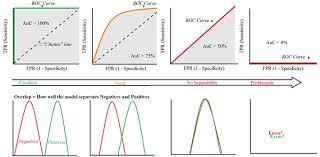

In [45]:
#ROC Curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob[:,1])

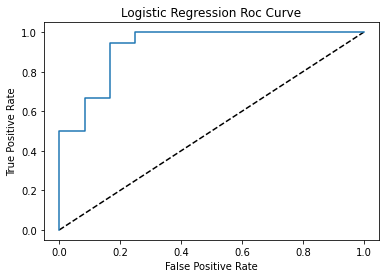

In [46]:
#plot curve
# To draw roc curve, results should be probabilistic
plt.plot([0,1],[0,1],"k--")#we drawed diagonal
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Roc Curve")
plt.show()

## Hyperparameter Tuning
* In logistic regression, there is a technique called regularization to prevent overfitting.
* There are different reqularization technique.
    * L1
    * L2
* Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.



In [47]:
lr=LogisticRegression()
lr

LogisticRegression()

In [48]:
penalty=['l1','l2']
parameters = {"penalty": penalty}



In [49]:
lr_searcher=GridSearchCV(lr,parameters)
lr_searcher


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [50]:
print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [51]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [52]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [53]:
y_pred=lr_searcher.predict(X_test)

In [54]:
print("Test accuracy:  {}".format(accuracy_score(y_pred,y_test)))

Test accuracy:  0.9
